In [1]:
import numpy as np
import pandas as pd 

In [24]:
import mat73

from tqdm import tqdm

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path, only_include=['Subset/Signals'])

    array_3d = data_dict['Subset']['Signals']

    reshaped = [[list(row[col]) for col in range(array_3d.shape[1])] for row in array_3d]

    signals_df = pd.DataFrame(reshaped, columns = ['ECG', 'PPG', 'ABP'])

    df = pd.DataFrame.from_dict({k: v for (k, v) in data_dict['Subset'].items() if k != 'Signals'})  

    df['Subject'] = df['Subject'].apply(lambda x: x[0])

    data_df = pd.concat([df, signals_df], axis=1)
    
    return data_df

In [25]:
file_path = './VitalDB_AAMI_Test_Subset.mat'
tr_file_path = './VitalDB_Train_Subset.mat'

In [26]:
test = mat73.loadmat(file_path)

In [ ]:
# Before we meet can you review the Objective I have, it is to create model that uses ECG, PPG and other signals to predict ABP 
# signal or mean ABP on each time window of 7-10s.
# Can you take a look on the data and let me know how much time you will need to achieve MAE of 7-8?

In [27]:
test['Subset'].keys()

dict_keys(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Signals', 'Subject', 'Weight'])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 86 steps due to diverging loss.
Restoring states from the checkpoint path at /home/repos/dl/pulse/.lr_find_5e1bfce5-1bac-4861-9797-16cf719a8bd2.ckpt
Restored all states from the checkpoint at /home/repos/dl/pulse/.lr_find_5e1bfce5-1bac-4861-9797-16cf719a8bd2.ckpt


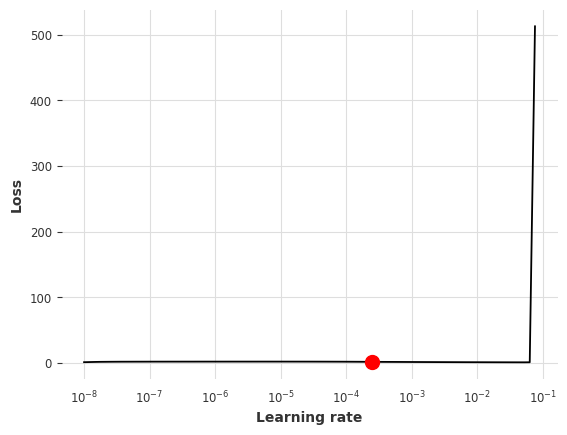

In [7]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
import matplotlib.pyplot as plt

dates = pd.date_range(start="2000-01-01", periods=500, freq='D')
amplitude = 1.0 + 0.1 * np.random.rand(len(dates))
y = amplitude * np.sin(np.linspace(0, 50, 500)) + np.random.normal(0, 0.1, 500)

series = TimeSeries.from_dataframe(pd.DataFrame({'date': dates, 'value': y}), 'date', 'value')
covariates_df = pd.DataFrame({'date': dates, 'amplitude': amplitude})
covariates = TimeSeries.from_dataframe(covariates_df, 'date', 'amplitude')

train, val = series.split_after(pd.Timestamp('2000-12-15'))
train_cov, val_cov = covariates.split_after(pd.Timestamp('2000-12-15'))

scaler_series = Scaler()
scaler_covariates = Scaler()

train_scaled = scaler_series.fit_transform(train)
val_scaled = scaler_series.transform(val)

train_cov_scaled = scaler_covariates.fit_transform(train_cov)
val_cov_scaled = scaler_covariates.transform(val_cov)

model = NBEATSModel(input_chunk_length=12, output_chunk_length=6, random_state=42)

results = model.lr_find(series=train_scaled, val_series=val_scaled, verbose=True)

results.plot(suggest=True, show=True)



In [19]:
model = NBEATSModel(
    input_chunk_length=12,
    output_chunk_length=6,
    random_state=42,
    optimizer_cls=torch.optim.Adam,
    optimizer_kwargs={"lr": results.suggestion()}
)

model.fit(
    series=train_scaled, 
    val_series=val_scaled,
    past_covariates=train_cov_scaled,
    val_past_covariates=val_cov_scaled,
    verbose=True
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/home/repos/dl/pulse/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=12, output_chunk_length=6, random_state=42, optimizer_cls=<class 'torch.optim.adam.Adam'>, optimizer_kwargs={'lr': 0.0002511886431509582})

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

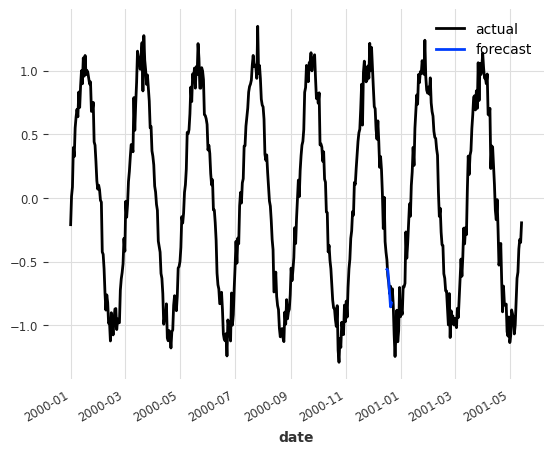

Mean Absolute Percentage Error: 7.67%


In [23]:
prediction = model.predict(
    n=6
)
prediction_descaled = scaler_series.inverse_transform(prediction)

series.plot(label='actual')
prediction_descaled.plot(label='forecast', lw=2)
plt.legend()
plt.show()

error = mape(prediction_descaled, val)
print(f"Mean Absolute Percentage Error: {error:.2f}%")